## Importations

In [83]:
import pandas as pd
import numpy as np
import sqlalchemy as sql
import configparser
import datetime
import seaborn as sns
import matplotlib.pyplot as plt 
import json

## Configuration

In [84]:
config = configparser.ConfigParser()
config.read('../config/default.ini')

['../config/default.ini']

In [85]:
engine = sql.create_engine('postgresql://{}:{}@{}:{}/{}'.format(config['DATABASE']['username'], config['DATABASE']['password'].replace('_percentage_', '%'), config['DATABASE']['host'], config['DATABASE']['port'], config['DATABASE']['database']))

## Utilitaires

In [86]:
def export_df(df, name, date=True):
    df.to_csv('output/{}{}.csv'.format('{}_'.format(datetime.datetime.strftime(datetime.datetime.now(), '%y%m%d')) if date else '', name), index=False, encoding='utf-8-sig')

In [87]:
def export_fig(plot, name, date=True):
    plot.savefig('images/{}{}.png'.format('{}_'.format(datetime.datetime.strftime(datetime.datetime.now(), '%y%m%d')) if date else '', name))

## Données

## DATASTREAM

In [88]:
df = pd.read_csv('input/201021_sessions_chartbeat.csv', sep='|')
df.head()

distribution  last_ping_timestamp     host         cookie_id  \
0         SITE           1603118228  rtbf.be  1cqHCz4d3iW/HJhf   
1         SITE           1603118197  rtbf.be  /zeoOZgDH4AvqjZj   
2         SITE           1603118168  rtbf.be  935yn4uNHTu0nQtK   
3         SITE           1603118200  rtbf.be  EJcDQOTsruE+K2/v   
4         SITE           1603118199  rtbf.be  CaHyJWFcKztXkrEo   

                page_session_id   domain  \
0  JzdV7WyjhpniIeZQ9b+6Z+WdnXY=  rtbf.be   
1  s14IcqScw+DfkD7BNNl9vKkXL6E=  rtbf.be   
2  pmMkauGxF+n0YhU/+LZi8KF+Dp4=  rtbf.be   
3  0nxQfJ99dOw50+MhkFfsLajQ98A=  rtbf.be   
4  XV8FY22ek+kMYWUOFIjSqGO15ks=  rtbf.be   

                                                path  new_user   device  \
0                                           rtbf.be/     False  desktop   
1                                       rtbf.be/info     False   mobile   
2                                 rtbf.be/sport/flux     False  desktop   
3  rtbf.be/info/societe/detail_nouvelles-mesures-...     False   mobile   
4  rtbf.be/info/regions/detail_une-situation-pire...     False   mobile   

   engaged_time_on_page_seconds  ...  account_id  \
0                             5  ...       65990   
1                            14  ...       65990   
2                             8  ...       65990   
3                           122  ...       65990   
4                            72  ...       65990   

                                          page_title  virtual_page  \
0  RTBF le site de la Radio Télévision Belge Fran...         False   
1  RTBF Info - La référence de l'actualité belge ...         False   
2  Toute l'actualité en direct et en continu - fi...         False   
3  Nouvelles mesures contre le coronavirus: qu'en...         False   
4  Une situation "pire qu’en mars" à Liège, selon...         False   

   scrolldepth total_time_on_page_seconds  ga_client_id login_id id_sync  \
0          838                          5           NaN      NaN     NaN   
1         4082                         15           NaN      NaN     NaN   
2          635                        120           NaN      NaN     NaN   
3         6236                        223           NaN      NaN     NaN   
4         7416                         90           NaN      NaN     NaN   

  subscriber_acct page_load_time  
0             NaN            622  
1             NaN            603  
2             NaN            238  
3             NaN            350  
4             NaN           2443  

[5 rows x 46 columns]

In [44]:
np.min(df['last_ping_timestamp'])

1603117960

In [49]:
df['datetime'] = df['last_ping_timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))

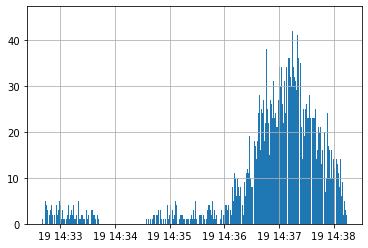

In [61]:
df['datetime'].hist(bins=360)

In [45]:
datetime.datetime.fromtimestamp(np.min(df['last_ping_timestamp']))

datetime.datetime(2020, 10, 19, 14, 32, 40)

In [46]:
datetime.datetime.fromtimestamp(np.max(df['last_ping_timestamp']))

datetime.datetime(2020, 10, 19, 14, 38, 14)

In [9]:
df.count()

distribution                    2757
last_ping_timestamp             2757
host                            2757
cookie_id                       2757
page_session_id                 2757
domain                          2757
path                            2757
new_user                        2757
device                          2757
engaged_time_on_page_seconds    2757
page_width                      2757
page_height                     2757
max_scroll_position_top         2757
window_height                   2757
external_referrer               1161
no_client_storage               2757
city_name                       2449
region_name                     2459
country_code                    2754
country_name                    2754
continent_name                  2754
dma_code                        2757
utc_offset_minutes              2757
user_agent                      2757
recency                         2757
frequency                       2757
internal_referrer               1113
a

In [10]:
df.shape

(2757, 46)

In [11]:
df.isnull().any()

distribution                    False
last_ping_timestamp             False
host                            False
cookie_id                       False
page_session_id                 False
domain                          False
path                            False
new_user                        False
device                          False
engaged_time_on_page_seconds    False
page_width                      False
page_height                     False
max_scroll_position_top         False
window_height                   False
external_referrer                True
no_client_storage               False
city_name                        True
region_name                      True
country_code                     True
country_name                     True
continent_name                   True
dma_code                        False
utc_offset_minutes              False
user_agent                      False
recency                         False
frequency                       False
internal_ref

In [64]:
cookie = df.groupby(by='cookie_id').size().reset_index().sort_values(0,ascending=False)
cookie

cookie_id  0
1790  iRj0fx6KjI71RGAp  5
2088  qqA090D4pw36xajS  5
272   5uGY80QvW0REXIs4  4
1754  hOLOk76v/1nRMt7w  4
1611  cwRfTaEvJz4BYoUX  4
...                ... ..
854   HoRer+lmaP1Yn1pR  1
855   HpmgwCC4fr3Dwosd  1
856   Ht/WSyJ7It0vpiN6  1
857   Hwcc1g3JLR3was2T  1
2420  zz2lWW4Z/3LUerXm  1

[2421 rows x 2 columns]

In [67]:
df[df['cookie_id'] == 'iRj0fx6KjI71RGAp']['frequency']

10      3
553     3
951     3
1441    3
1925    3
Name: frequency, dtype: int64

In [15]:
[{'column': col, 'len_unique': len(df[col].unique()), 'unique_vals':  df[col].unique()} for col in df.columns]

[{'column': 'distribution',
  'len_unique': 1,
  'unique_vals': array(['SITE'], dtype=object)},
 {'column': 'last_ping_timestamp',
  'len_unique': 259,
  'unique_vals': array([1603118228, 1603118197, 1603118168, 1603118200, 1603118199,
         1603118189, 1603118204, 1603118232, 1603118234, 1603118180,
         1603118226, 1603118230, 1603118233, 1603118188, 1603118202,
         1603118227, 1603118203, 1603118182, 1603117963, 1603118169,
         1603118075, 1603118076, 1603118164, 1603118229, 1603118174,
         1603118235, 1603118196, 1603118163, 1603118201, 1603118143,
         1603118205, 1603118167, 1603118142, 1603118184, 1603118231,
         1603118165, 1603118138, 1603118183, 1603118187, 1603118137,
         1603118079, 1603118078, 1603118175, 1603118171, 1603118185,
         1603118198, 1603118206, 1603118236, 1603118172, 1603118144,
         1603118173, 1603118104, 1603118191, 1603118237, 1603117960,
         1603118176, 1603118170, 1603118162, 1603118177, 1603118141,
     

In [47]:
df[df['country_code'] == 'CO']['utc_offset_minutes']

157   -300
Name: utc_offset_minutes, dtype: int64

In [69]:
len(df.columns)

47

## TRACKER

In [92]:
events_tracker = []
with open('input/20201008-track.v2.0.log', 'r') as f:
    line = json.loads(f.readlines())
    while line:
        print(line)
        events_tracker.append(json.loads(line))
        line = f.readline()
print(len(events_tracker))

TypeError: the JSON object must be str, bytes or bytearray, not list

In [64]:
df_tracker = pd.DataFrame(events_tracker)
df_tracker.head()

type                @timestamp @version  \
0    page  2020-10-19T14:32:00.005Z        1   
1  player  2020-10-19T14:32:00.005Z        1   
2  player  2020-10-19T14:32:00.005Z        1   
3  player  2020-10-19T14:32:00.005Z        1   
4  player  2020-10-19T14:32:00.006Z        1   

                                                data  
0  {'uid': 'cb2e25e0-cc98-cd57-d587-81a43068d252'...  
1  {'mediaId': '2693017', 'uid': '69831d28-7f8a-3...  
2  {'mediaId': '2693017', 'uid': '69831d28-7f8a-3...  
3  {'mediaId': '2693017', 'uid': '69831d28-7f8a-3...  
4  {'mediaId': '2693017', 'uid': '69831d28-7f8a-3...

In [65]:
columns = list(df_tracker.columns)
columns

['type', '@timestamp', '@version', 'data']

In [66]:
df_tracker.head()

type                @timestamp @version  \
0    page  2020-10-19T14:32:00.005Z        1   
1  player  2020-10-19T14:32:00.005Z        1   
2  player  2020-10-19T14:32:00.005Z        1   
3  player  2020-10-19T14:32:00.005Z        1   
4  player  2020-10-19T14:32:00.006Z        1   

                                                data  
0  {'uid': 'cb2e25e0-cc98-cd57-d587-81a43068d252'...  
1  {'mediaId': '2693017', 'uid': '69831d28-7f8a-3...  
2  {'mediaId': '2693017', 'uid': '69831d28-7f8a-3...  
3  {'mediaId': '2693017', 'uid': '69831d28-7f8a-3...  
4  {'mediaId': '2693017', 'uid': '69831d28-7f8a-3...

In [67]:
to_remove = []

In [68]:
for col in columns:
    if type(df_tracker.iloc[0][col]) == dict:
        to_remove.append(col)
        for key in df_tracker.iloc[0][col].keys():
            new_key = '{}.{}'.format(col, key)
            df_tracker[new_key] = df_tracker[col].apply(lambda x: x[key] if key in x else np.nan)
            columns.append(new_key)
df_tracker.head()  

type                @timestamp @version  \
0    page  2020-10-19T14:32:00.005Z        1   
1  player  2020-10-19T14:32:00.005Z        1   
2  player  2020-10-19T14:32:00.005Z        1   
3  player  2020-10-19T14:32:00.005Z        1   
4  player  2020-10-19T14:32:00.006Z        1   

                                                data  \
0  {'uid': 'cb2e25e0-cc98-cd57-d587-81a43068d252'...   
1  {'mediaId': '2693017', 'uid': '69831d28-7f8a-3...   
2  {'mediaId': '2693017', 'uid': '69831d28-7f8a-3...   
3  {'mediaId': '2693017', 'uid': '69831d28-7f8a-3...   
4  {'mediaId': '2693017', 'uid': '69831d28-7f8a-3...   

                               data.uid  \
0  cb2e25e0-cc98-cd57-d587-81a43068d252   
1  69831d28-7f8a-395d-c7c9-d7a3c5de96fb   
2  69831d28-7f8a-395d-c7c9-d7a3c5de96fb   
3  69831d28-7f8a-395d-c7c9-d7a3c5de96fb   
4  69831d28-7f8a-395d-c7c9-d7a3c5de96fb   

                                           data.tags  \
0  [{'viewport': {'width': 360, 'height': 560}}, ...   
1                                                 []   
2                                                 []   
3                                                 []   
4                                                 []   

                                         data.screen  \
0  {'path': 'info/regions/detail', 'version': '1....   
1  {'path': 'sport/dossier/les-classiques/detail'...   
2  {'path': 'sport/dossier/les-classiques/detail'...   
3  {'path': 'sport/dossier/les-classiques/detail'...   
4  {'path': 'sport/dossier/les-classiques/detail'...   

                               data.sid  \
0  344b3aa0-c4d4-f119-2a64-dfb5684ed30d   
1  7d2896fe-8758-647f-26aa-4bb9517447e1   
2  7d2896fe-8758-647f-26aa-4bb9517447e1   
3  7d2896fe-8758-647f-26aa-4bb9517447e1   
4  7d2896fe-8758-647f-26aa-4bb9517447e1   

                                        data.version  \
0  {'model_version': '1.4.1', 'application_versio...   
1  {'model_version': '1.4.1', 'application_versio...   
2  {'model_version': '1.4.1', 'application_versio...   
3  {'model_version': '1.4.1', 'application_versio...   
4  {'model_version': '1.4.1', 'application_versio...   

                                        data.context  ...  \
0  {'device': 'PC', 'header': {'origin': 'https:/...  ...   
1  {'device': 'PC', 'header': {'origin': 'https:/...  ...   
2  {'device': 'PC', 'header': {'origin': 'https:/...  ...   
3  {'device': 'PC', 'header': {'origin': 'https:/...  ...   
4  {'device': 'PC', 'header': {'origin': 'https:/...  ...   

  data.context.version data.context.timestamp data.context.platform  \
0                  1.1          1603117918594               browser   
1                  1.1          1603117918668               browser   
2                  1.1          1603117918883               browser   
3                  1.1          1603117918974               browser   
4                  1.1          1603117919035               browser   

  data.time.navigation data.context.header.origin  \
0                   65        https://www.rtbf.be   
1                   67        https://www.rtbf.be   
2                   67        https://www.rtbf.be   
3                   67        https://www.rtbf.be   
4                   67        https://www.rtbf.be   

  data.context.header.x_forwarded_proto  data.context.header.host  \
0                                 https  tracker2.prd.bda.rtbf.be   
1                                 https  tracker2.prd.bda.rtbf.be   
2                                 https  tracker2.prd.bda.rtbf.be   
3                                 https  tracker2.prd.bda.rtbf.be   
4                                 https  tracker2.prd.bda.rtbf.be   

  data.context.header.version  \
0                         1.0   
1                         1.0   
2                         1.0   
3                         1.0   
4                         1.0   

                      data.context.header.user_agent  \
0  Mozilla/5.0 (Linux; Android 8.0.0; SM-G930F) A...   
1  Mozilla/

In [69]:
for col in to_remove:
    del df_tracker[col]

In [71]:
df_tracker.head()

type                @timestamp @version  \
0    page  2020-10-19T14:32:00.005Z        1   
1  player  2020-10-19T14:32:00.005Z        1   
2  player  2020-10-19T14:32:00.005Z        1   
3  player  2020-10-19T14:32:00.005Z        1   
4  player  2020-10-19T14:32:00.006Z        1   

                               data.uid  \
0  cb2e25e0-cc98-cd57-d587-81a43068d252   
1  69831d28-7f8a-395d-c7c9-d7a3c5de96fb   
2  69831d28-7f8a-395d-c7c9-d7a3c5de96fb   
3  69831d28-7f8a-395d-c7c9-d7a3c5de96fb   
4  69831d28-7f8a-395d-c7c9-d7a3c5de96fb   

                                           data.tags  \
0  [{'viewport': {'width': 360, 'height': 560}}, ...   
1                                                 []   
2                                                 []   
3                                                 []   
4                                                 []   

                               data.sid data.action  \
0  344b3aa0-c4d4-f119-2a64-dfb5684ed30d      SCROLL   
1  7d2896fe-8758-647f-26aa-4bb9517447e1     SEEKING   
2  7d2896fe-8758-647f-26aa-4bb9517447e1      SEEKED   
3  7d2896fe-8758-647f-26aa-4bb9517447e1     SEEKING   
4  7d2896fe-8758-647f-26aa-4bb9517447e1      SEEKED   

                      data.screen.path data.screen.version data.screen.type  \
0                  info/regions/detail                 1.1          article   
1  sport/dossier/les-classiques/detail                 1.1          article   
2  sport/dossier/les-classiques/detail                 1.1          article   
3  sport/dossier/les-classiques/detail                 1.1          article   
4  sport/dossier/les-classiques/detail                 1.1          article   

   ... data.context.version data.context.timestamp data.context.platform  \
0  ...                  1.1          1603117918594               browser   
1  ...                  1.1          1603117918668               browser   
2  ...                  1.1          1603117918883               browser   
3  ...                  1.1          1603117918974               browser   
4  ...                  1.1          1603117919035               browser   

  data.time.navigation data.context.header.origin  \
0                   65        https://www.rtbf.be   
1                   67        https://www.rtbf.be   
2                   67        https://www.rtbf.be   
3                   67        https://www.rtbf.be   
4                   67        https://www.rtbf.be   

  data.context.header.x_forwarded_proto  data.context.header.host  \
0                                 https  tracker2.prd.bda.rtbf.be   
1                                 https  tracker2.prd.bda.rtbf.be   
2                                 https  tracker2.prd.bda.rtbf.be   
3                                 https  tracker2.prd.bda.rtbf.be   
4                                 https  tracker2.prd.bda.rtbf.be   

  data.context.header.version  \
0                         1.0   
1                         1.0   
2                         1.0   
3                         1.0   
4                         1.0   

                      data.context.header.user_agent  \
0  Mozilla/5.0 (Linux; Android 8.0.0; SM-G930F) A...   
1  Mozilla/5.0 (Linux; Android 10; SM-A705FN) App...   
2  Mozilla/5.0 (Linux; Android 10; SM-A705FN) App...   
3  Mozilla/5.0 (Linux; Android 10; SM-A705FN) App...   
4  Mozilla/5.0 (Linux; Android 10; SM-A705FN) App...   

  data.context.header.x_forwarded_for  
0                      91.182.166.207  
1                       94.109.175.47  
2                       94.109.175.47  
3                       94.109.175.47  
4                       94.109.175.47  

[5 rows x 25 columns]

In [73]:
df_tracker.count()

type                                     200752
@timestamp                               200752
@version                                 200752
data.uid                                 200743
data.tags                                199301
data.sid                                 200743
data.action                              200752
data.screen.path                         200751
data.screen.version                      194797
data.screen.type                         171588
data.screen.id                           173743
data.version.model_version               200752
data.version.application_version         200752
data.version.version                     200752
data.context.device                      200752
data.context.version                     200752
data.context.timestamp                   200752
data.context.platform                    200752
data.time.navigation                     200752
data.context.header.origin               194797
data.context.header.x_forwarded_proto   

In [70]:
df_tracker.shape

(200752, 25)

In [75]:
df_tracker.isnull().any()

type                                     False
@timestamp                               False
@version                                 False
data.uid                                  True
data.tags                                 True
data.sid                                  True
data.action                              False
data.screen.path                          True
data.screen.version                       True
data.screen.type                          True
data.screen.id                            True
data.version.model_version               False
data.version.application_version         False
data.version.version                     False
data.context.device                      False
data.context.version                     False
data.context.timestamp                   False
data.context.platform                    False
data.time.navigation                     False
data.context.header.origin                True
data.context.header.x_forwarded_proto    False
data.context.

In [78]:
df_tracker.dtypes

type                                     object
@timestamp                               object
@version                                 object
data.uid                                 object
data.tags                                object
data.sid                                 object
data.action                              object
data.screen.path                         object
data.screen.version                      object
data.screen.type                         object
data.screen.id                           object
data.version.model_version               object
data.version.application_version         object
data.version.version                     object
data.context.device                      object
data.context.version                     object
data.context.timestamp                    int64
data.context.platform                    object
data.time.navigation                      int64
data.context.header.origin               object
data.context.header.x_forwarded_proto   

In [82]:
[{'column': col, 'len_unique': len(df_tracker[col].unique()), 'unique_vals':  df_tracker[col].unique()[:5]} for col in df_tracker.columns if type(df_tracker.iloc[0][col]) != list]

[{'column': 'type',
  'len_unique': 4,
  'unique_vals': array(['page', 'player', 'userchange', 'user_change'], dtype=object)},
 {'column': '@timestamp',
  'len_unique': 33358,
  'unique_vals': array(['2020-10-19T14:32:00.005Z', '2020-10-19T14:32:00.006Z',
         '2020-10-19T14:32:00.007Z', '2020-10-19T14:32:00.008Z',
         '2020-10-19T14:32:00.009Z'], dtype=object)},
 {'column': '@version',
  'len_unique': 1,
  'unique_vals': array(['1'], dtype=object)},
 {'column': 'data.uid',
  'len_unique': 18413,
  'unique_vals': array(['cb2e25e0-cc98-cd57-d587-81a43068d252',
         '69831d28-7f8a-395d-c7c9-d7a3c5de96fb',
         '203c2ac0-1f14-b9fb-ec1d-65a6240e61ae',
         'bc850262-b5d1-ab7d-b38d-0975089a641d',
         '5d1b19f604584a66b334dabcd86e8995'], dtype=object)},
 {'column': 'data.sid',
  'len_unique': 20607,
  'unique_vals': array(['344b3aa0-c4d4-f119-2a64-dfb5684ed30d',
         '7d2896fe-8758-647f-26aa-4bb9517447e1',
         '82b5ade1-57d4-c871-386c-9bda650fe215',
       

## Graphs

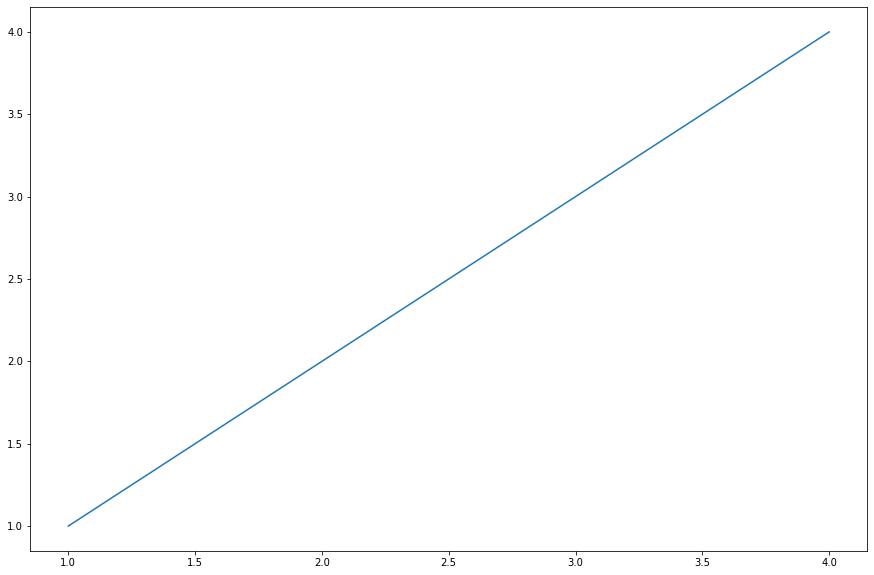

In [2]:
plt.figure(figsize = (15,10))
sns.lineplot(x=[1,2,3,4], y=[1,2,3,4])
plt.show()